In [7]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 載入 Iris 資料集
iris = load_iris()
X = iris.data  # 特徵: sepal length, sepal width, petal length, petal width
y = iris.target  # 類別標籤

# 資料標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 使用 K-Means 進行聚類
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

#  獲取聚類標籤
cluster_labels = kmeans.labels_

In [8]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

K-Means Accuracy: 0.83
Silhouette Score: 0.46


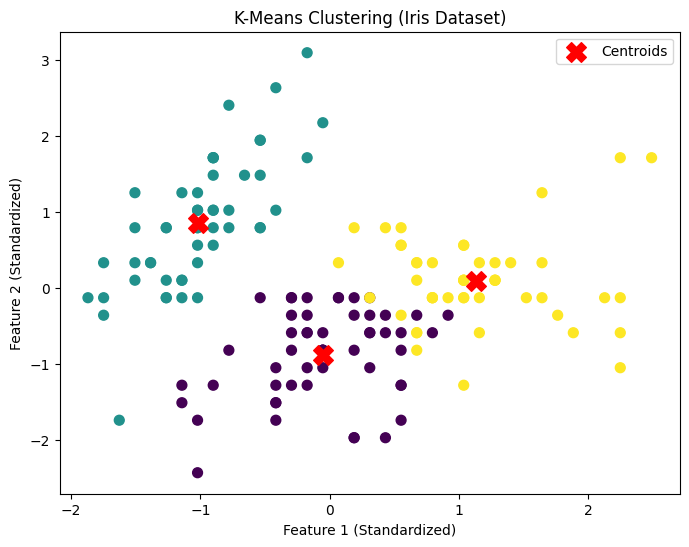

<Figure size 640x480 with 0 Axes>

In [10]:
def map_clusters_to_labels(cluster_labels, true_labels):
    mapping = {}
    for cluster in np.unique(cluster_labels):
        mask = cluster_labels == cluster
        most_common = np.bincount(true_labels[mask]).argmax()
        mapping[cluster] = most_common
    return np.array([mapping[cluster] for cluster in cluster_labels])

mapped_labels = map_clusters_to_labels(cluster_labels, y)
accuracy = accuracy_score(y, mapped_labels)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)

print(f"K-Means Accuracy: {accuracy:.2f}")
print(f"Silhouette Score: {silhouette_avg:.2f}")

# 可視化
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering (Iris Dataset)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend()
plt.show()
plt.savefig('K-Means Clustering (Iris Dataset).png')